In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/Disponibilidad_Comercial.xlsx')
df2 = pd.read_excel('/content/Faltantes.xlsx')

In [ ]:
df = df.append(df2)

In [ ]:
df.head(5)

,Fecha,Código Agente,Recurso,ACTIVIDAD,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,agente
0,2000-01-01,EPSG,ALTO ANCHICAYA,GENERACIÓN,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,NaN
1,2000-01-01,EPSG,BAJO ANCHICAYA,GENERACIÓN,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,NaN
2,2000-01-01,ESSG,BARRANCA 1,GENERACIÓN,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,NaN
3,2000-01-01,ESSG,BARRANCA 2,GENERACIÓN,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,NaN
4,2000-01-01,ESSG,BARRANCA 3,GENERACIÓN,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,NaN


In [ ]:
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.head(5)

,Fecha,Código Agente,Recurso,ACTIVIDAD,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,agente
0,2000-01-01,EPSG,ALTO ANCHICAYA,GENERACIÓN,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,365000.0,NaN
1,2000-01-01,EPSG,BAJO ANCHICAYA,GENERACIÓN,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,73000.0,NaN
2,2000-01-01,ESSG,BARRANCA 1,GENERACIÓN,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,NaN
3,2000-01-01,ESSG,BARRANCA 2,GENERACIÓN,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,NaN
4,2000-01-01,ESSG,BARRANCA 3,GENERACIÓN,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,NaN


In [ ]:
def melt_df(df):
    #Hours
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, column names
    hours_str = list(map(str, hours))
    #Melt original dataframe
    df_melt=pd.melt(df,id_vars=["Fecha"],value_vars=hours_str,var_name='Hour', value_name='Disponibilidad')
    #Convert string to float
    df_melt["Hour"]=pd.to_numeric(df_melt["Hour"])
    

    #Add hours to the date which only had considered the day
    df_melt["Fecha"]=df_melt["Fecha"]+pd.to_timedelta(df_melt["Hour"],unit='H')
    #Order de data
    df_melt.sort_values(by=['Fecha'], inplace=True, ascending=False) #Most recent first
    #Reset index
    df_melt=df_melt.reset_index(drop=True)
    
    return df_melt

In [ ]:
melt_df(df)

,Fecha,Hour,Disponibilidad
0,2019-12-31 23:00:00,23,0.0
1,2019-12-31 23:00:00,23,0.0
2,2019-12-31 23:00:00,23,1084.0
3,2019-12-31 23:00:00,23,0.0
4,2019-12-31 23:00:00,23,207000.0
...,...,...,...
26794171,2000-01-01 00:00:00,0,13000.0
26794172,2000-01-01 00:00:00,0,150000.0
26794173,2000-01-01 00:00:00,0,68000.0
26794174,2000-01-01 00:00:00,0,68000.0


In [ ]:
ts = melt_df(df).sort_values(by='Fecha')
ts

,Fecha,Hour,Disponibilidad
26794175,2000-01-01 00:00:00,0,365000.00
26794141,2000-01-01 00:00:00,0,12000.00
26794140,2000-01-01 00:00:00,0,55000.00
26794139,2000-01-01 00:00:00,0,30000.00
26794138,2000-01-01 00:00:00,0,18000.00
...,...,...,...
146,2019-12-31 23:00:00,23,231.83
145,2019-12-31 23:00:00,23,3703.70
144,2019-12-31 23:00:00,23,912.52
142,2019-12-31 23:00:00,23,0.00


In [ ]:
ts = ts.sort_values(by='Fecha').drop('Hour', axis = 1).set_index('Fecha')
ts

,Disponibilidad
Fecha,
2000-01-01 00:00:00,365000.00
2000-01-01 00:00:00,68000.00
2000-01-01 00:00:00,150000.00
2000-01-01 00:00:00,13000.00
2000-01-01 00:00:00,200000.00
...,...
2019-12-31 23:00:00,1084.00
2019-12-31 23:00:00,0.00
2019-12-31 23:00:00,683.06


In [ ]:
ts['Date'] = ts.index.date
ts['Year'] = ts.index.year
ts

,Disponibilidad,Date,Year
Fecha,,,
2000-01-01 00:00:00,365000.00,2000-01-01,2000
2000-01-01 00:00:00,68000.00,2000-01-01,2000
2000-01-01 00:00:00,150000.00,2000-01-01,2000
2000-01-01 00:00:00,13000.00,2000-01-01,2000
2000-01-01 00:00:00,200000.00,2000-01-01,2000
...,...,...,...
2019-12-31 23:00:00,1084.00,2019-12-31,2019
2019-12-31 23:00:00,0.00,2019-12-31,2019
2019-12-31 23:00:00,683.06,2019-12-31,2019


In [ ]:
AvailabilityDF = ts.Disponibilidad.groupby(ts.Date).agg(['sum','min','max', np.mean, np.median, np.std])
AvailabilityDF['fluctuation'] = AvailabilityDF['max'] - AvailabilityDF['min']
AvailabilityDF

,sum,min,max,mean,median,std,fluctuation
Date,,,,,,,
2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0
2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0
2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0
2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0
2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0
...,...,...,...,...,...,...,...
2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0
2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0
2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0


In [ ]:
import matplotlib.pyplot as plt

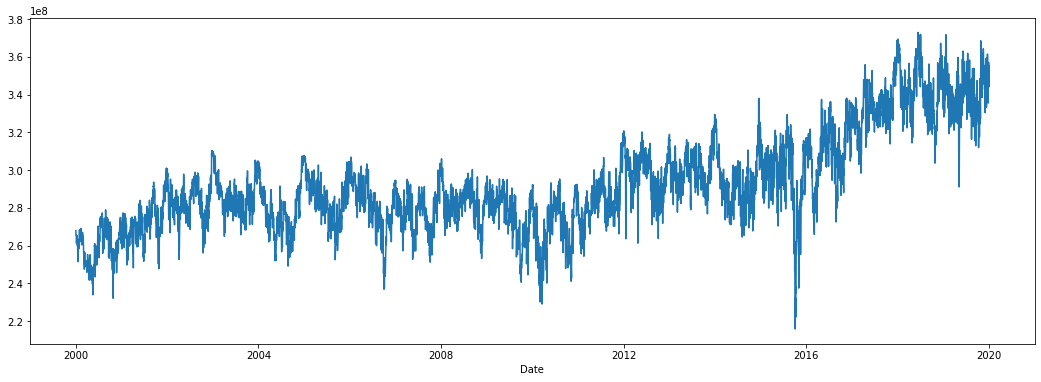

In [ ]:
AvailabilityDF['sum'].plot(figsize=(18, 6))

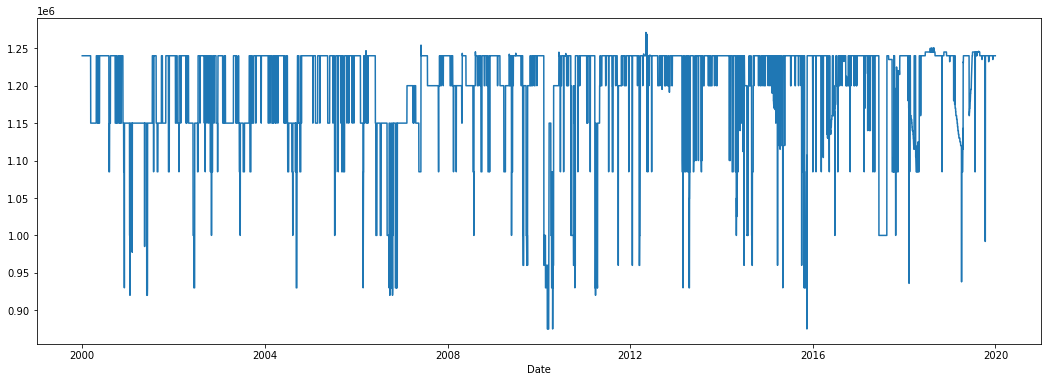

In [ ]:
AvailabilityDF['max'].plot(figsize=(18, 6))

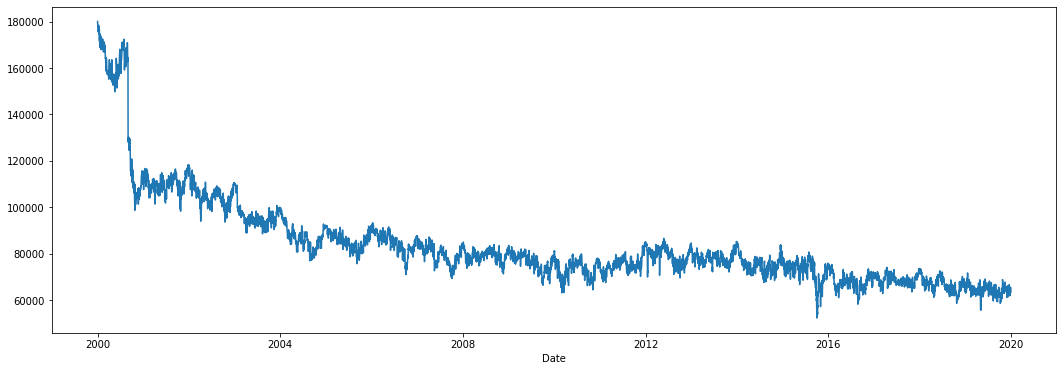

In [ ]:
AvailabilityDF['mean'].plot(figsize=(18, 6))

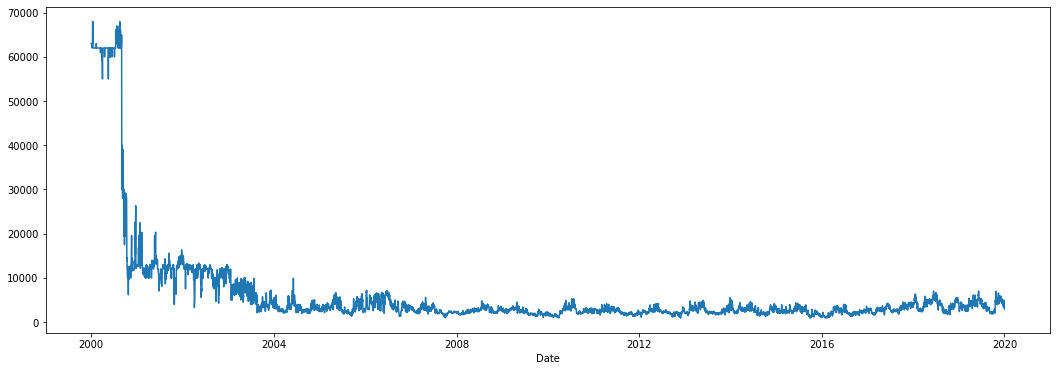

In [ ]:
AvailabilityDF['median'].plot(figsize=(18, 6))

In [ ]:
AvailabilityDF2 = AvailabilityDF.reset_index()
AvailabilityDF2["Date"] = pd.to_datetime(AvailabilityDF2["Date"])
AvailabilityDF2 = AvailabilityDF2.set_index('Date')
AvailabilityDF2['year'] = AvailabilityDF2.index.year
AvailabilityDF2

,sum,min,max,mean,median,std,fluctuation,year
Date,,,,,,,,
2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0,2000
2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0,2000
2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0,2000
2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0,2000
2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0,2000
...,...,...,...,...,...,...,...,...
2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0,2019
2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0,2019
2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0,2019


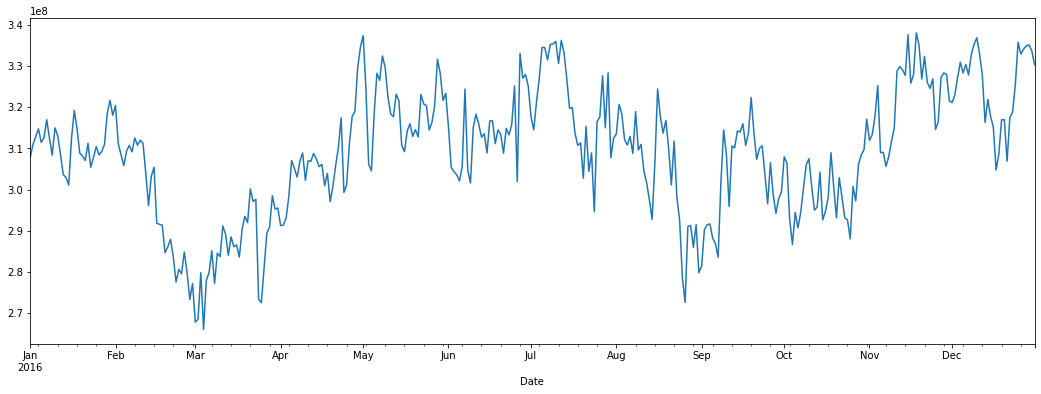

In [ ]:
AvailabilityDF2['sum'][AvailabilityDF2['year'] == 2016].plot(figsize=(18, 6))

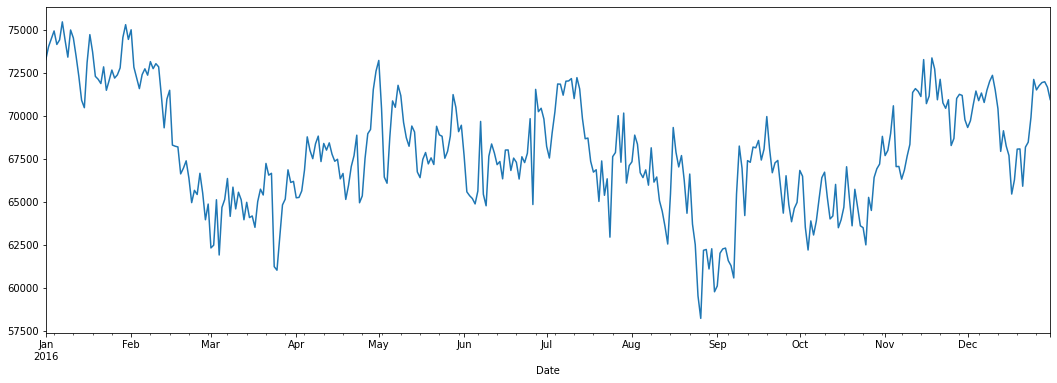

In [ ]:
AvailabilityDF2['mean'][AvailabilityDF2['year'] == 2016].plot(figsize=(18, 6))

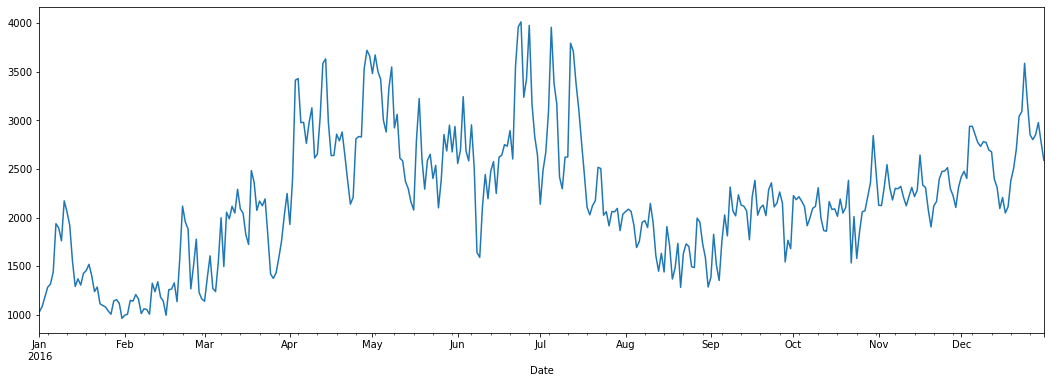

In [ ]:
AvailabilityDF2['median'][AvailabilityDF2['year'] == 2016].plot(figsize=(18, 6))

In [ ]:
AvailabilityDF2.to_csv('AvailabilityDF2.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Daily_Market_Price = pd.read_csv('/content/Daily_Market_Price.csv')
Daily_Market_Price

,Date,min,max,mean,median,std,fluctuation
0,1995-07-20,1.073,2.827,1.409435,1.073,0.627518,1.754
1,1995-07-21,1.000,16.670,4.924333,5.000,4.337455,15.670
2,1995-07-22,1.000,2.500,1.269500,1.188,0.401461,1.500
3,1995-07-23,0.100,1.238,0.953083,1.000,0.344377,1.138
4,1995-07-24,0.990,22.500,4.305917,2.500,5.671871,21.510
...,...,...,...,...,...,...,...
9486,2021-07-09,83.430,98.040,90.571250,84.940,7.034694,14.610
9487,2021-07-10,83.150,97.760,85.156250,84.000,3.785181,14.610
9488,2021-07-11,83.100,83.920,83.352917,83.100,0.373462,0.820
9489,2021-07-12,84.430,85.340,84.980000,85.290,0.418642,0.910


In [ ]:
Daily_Market_Price.columns

Index(['Date', 'min', 'max', 'mean', 'median', 'std', 'fluctuation'], dtype='object')

In [ ]:
DMC = ['Date','min_Price', 'max_Price', 'mean_Price', 'median_Price', 'std_Price', 'fluctuation_Price']

In [ ]:
Daily_Market_Price.columns = DMC
Daily_Market_Price

,Date,min_Price,max_Price,mean_Price,median_Price,std_Price,fluctuation_Price
0,1995-07-20,1.073,2.827,1.409435,1.073,0.627518,1.754
1,1995-07-21,1.000,16.670,4.924333,5.000,4.337455,15.670
2,1995-07-22,1.000,2.500,1.269500,1.188,0.401461,1.500
3,1995-07-23,0.100,1.238,0.953083,1.000,0.344377,1.138
4,1995-07-24,0.990,22.500,4.305917,2.500,5.671871,21.510
...,...,...,...,...,...,...,...
9486,2021-07-09,83.430,98.040,90.571250,84.940,7.034694,14.610
9487,2021-07-10,83.150,97.760,85.156250,84.000,3.785181,14.610
9488,2021-07-11,83.100,83.920,83.352917,83.100,0.373462,0.820
9489,2021-07-12,84.430,85.340,84.980000,85.290,0.418642,0.910


In [ ]:
AvailabilityDF2 = pd.read_csv('/content/AvailabilityDF2.csv')
AvailabilityDF2

,Date,sum,min,max,mean,median,std,fluctuation,year
0,2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0,2000
1,2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0,2000
2,2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0,2000
3,2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0,2000
4,2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0,2000
...,...,...,...,...,...,...,...,...,...
7300,2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0,2019
7301,2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0,2019
7302,2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0,2019
7303,2019-12-30,3.440779e+08,0.0,1240000.0,63156.740677,4157.110,164346.920508,1240000.0,2019


In [ ]:
AvailabilityDF2 = AvailabilityDF2.reset_index()
AvailabilityDF2.columns

Index(['index', 'Date', 'sum', 'min', 'max', 'mean', 'median', 'std',
       'fluctuation', 'year'],
      dtype='object')

In [ ]:
A = ['index','Date','sum_Av', 'min_Av', 'max_Av', 'mean_Av', 'median_Av', 'std_Av', 'fluctuation_Av', 'year']

In [ ]:
AvailabilityDF2.columns = A
AvailabilityDF2.columns

Index(['index', 'Date', 'sum_Av', 'min_Av', 'max_Av', 'mean_Av', 'median_Av',
       'std_Av', 'fluctuation_Av', 'year'],
      dtype='object')

In [ ]:
AvailabilityDF2.dtypes

Date              datetime64[ns]
sum_Av                   float64
min_Av                   float64
max_Av                   float64
mean_Av                  float64
median_Av                float64
std_Av                   float64
fluctuation_Av           float64
year                       int64
dtype: object

In [ ]:
Daily_Market_Price["Date"] = pd.to_datetime(Daily_Market_Price["Date"])
AvailabilityDF2["Date"] = pd.to_datetime(AvailabilityDF2["Date"])

In [ ]:
Daily_Market_Price.dtypes

Date                 datetime64[ns]
min_Price                   float64
max_Price                   float64
mean_Price                  float64
median_Price                float64
std_Price                   float64
fluctuation_Price           float64
dtype: object

In [ ]:
merge1 = AvailabilityDF2.merge(Daily_Market_Price, how = 'inner', on = 'Date')
merge1

,index,Date,sum_Av,min_Av,max_Av,mean_Av,median_Av,std_Av,fluctuation_Av,year,min_Price,max_Price,mean_Price,median_Price,std_Price,fluctuation_Price
0,0,2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0,2000,32.284788,46.284788,32.868121,32.284788,2.857738,14.000
1,1,2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0,2000,32.284788,50.284788,33.034788,32.284788,3.674235,18.000
2,2,2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0,2000,32.284788,50.284788,37.272288,32.284788,7.710767,18.000
3,3,2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0,2000,32.284788,50.284788,41.688955,41.284788,8.150672,18.000
4,4,2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0,2000,32.284788,51.284788,40.893121,41.284788,7.956234,19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,7300,2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0,2019,249.839113,470.839113,331.918405,351.789113,69.608633,221.000
7301,7301,2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0,2019,229.512930,315.012930,279.387930,315.012930,43.058668,85.500
7302,7302,2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0,2019,199.389260,476.389260,246.472593,249.389260,53.701200,277.000
7303,7303,2019-12-30,3.440779e+08,0.0,1240000.0,63156.740677,4157.110,164346.920508,1240000.0,2019,249.392898,476.392898,323.892898,299.642898,88.799114,227.000


In [ ]:
merge1.dtypes

Date                 datetime64[ns]
sum_Av                      float64
min_Av                      float64
max_Av                      float64
mean_Av                     float64
median_Av                   float64
std_Av                      float64
fluctuation_Av              float64
year                          int64
min_Price                   float64
max_Price                   float64
mean_Price                  float64
median_Price                float64
std_Price                   float64
fluctuation_Price           float64
dtype: object

In [ ]:
merge1 = merge1.set_index('Date')

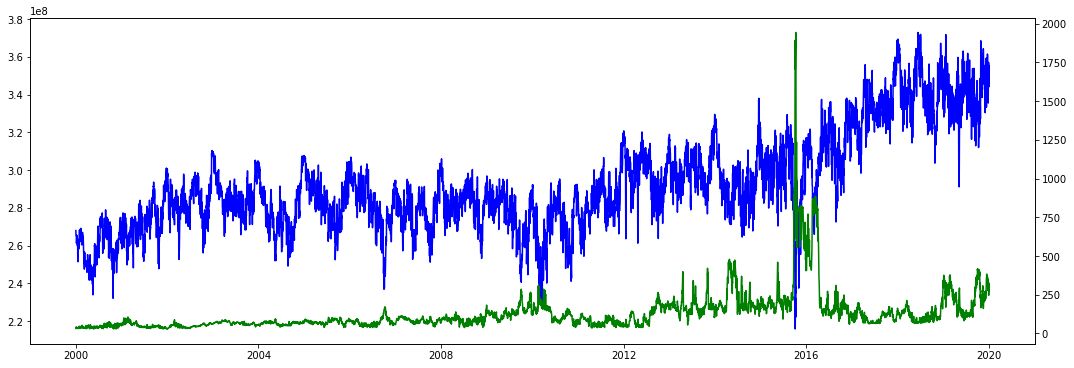

In [ ]:
fig, ax_left = plt.subplots(figsize=(18, 6))
ax_right = ax_left.twinx()
ax_left.plot(merge1.sum_Av, color='blue', linestyle='-')
ax_right.plot(merge1.mean_Price, color='green')

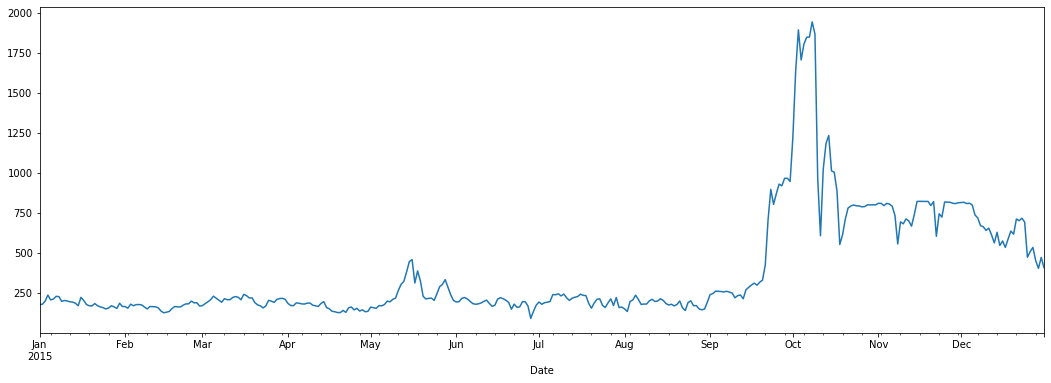

In [ ]:
merge1['mean_Price'][merge1['year'] == 2015].plot(figsize=(18, 6))

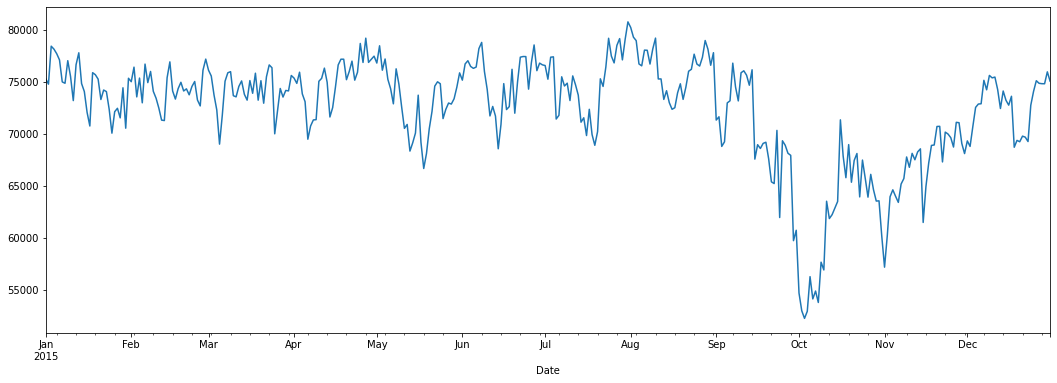

In [ ]:
merge1['mean_Av'][merge1['year'] == 2015].plot(figsize=(18, 6))

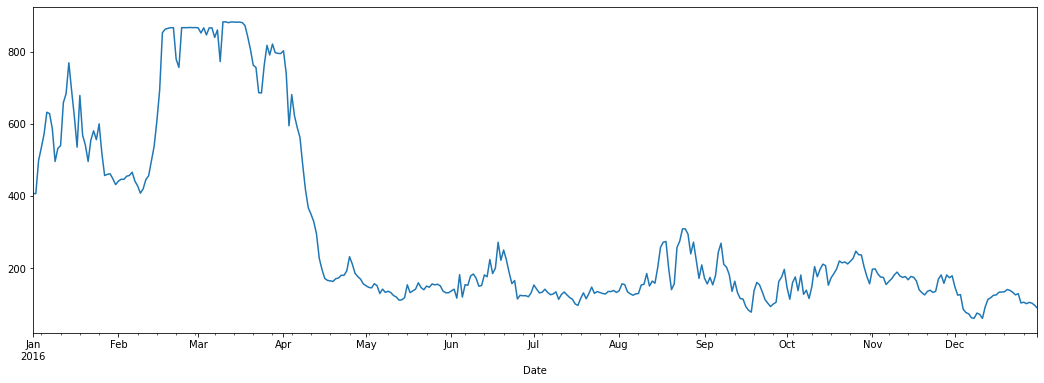

In [ ]:
merge1['mean_Price'][merge1['year'] == 2016].plot(figsize=(18, 6))

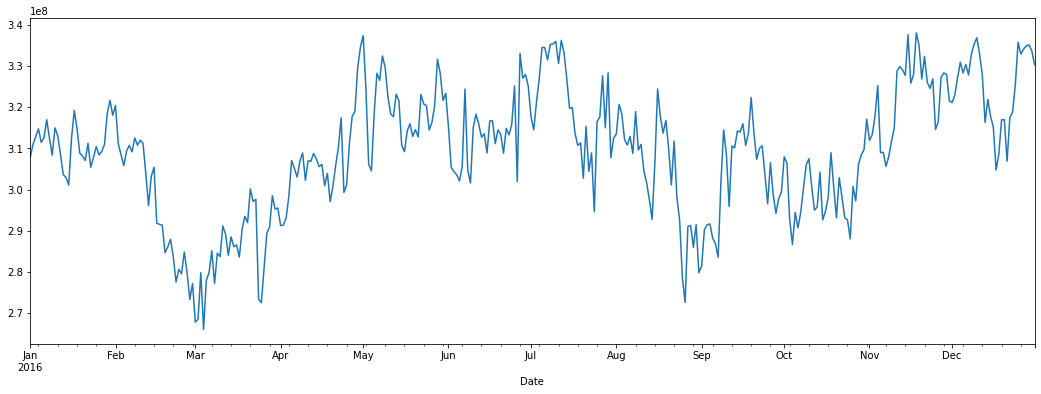

In [ ]:
merge1['sum_Av'][merge1['year'] == 2016].plot(figsize=(18, 6))